In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import mne
from mne.preprocessing import ICA
#import mnelab
import matplotlib.dates as mdate
data_path=r'C:\\Users\\FJQ\Desktop\sub01-05\sub01-05\sub01\\t1_task_convert.cdt.edf'
raw=mne.io.read_raw_edf(data_path,preload=True,exclude=('EGG','ECG'))
chan_types_dict={raw.info.ch_names[i]:'eeg' for i in range(32)}
chan_types_dict={'VEOG':'eog','HEOG':'eog'}
raw.set_channel_types(chan_types_dict)
#重命名原始数据中的通道名称
raw.rename_channels(mapping={'F11':'F9','F12':'F10','FT11':'FT9','FT12':'FT10'})
raw.info.set_montage('standard_1020')
montage=mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage,on_missing='raise',verbose=None)

Extracting EDF parameters from C:\Users\FJQ\Desktop\sub01-05\sub01-05\sub01\t1_task_convert.cdt.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157599  =      0.000 ...   153.905 secs...


Measurement date,"August 20, 2022 10:38:01 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,"32 EEG, 2 EOG, 1 Stimulus"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


Using matplotlib as 2D backend.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


C:\Users\FJQ\AppData\Local\Temp\ipykernel_18896\2574756169.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=True)


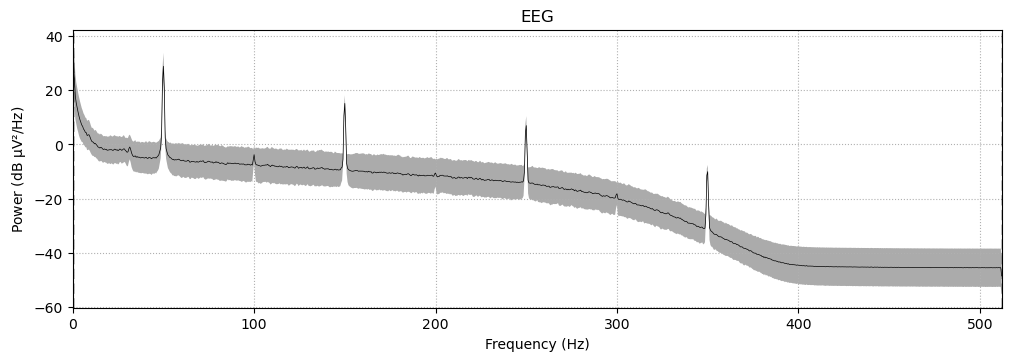

In [3]:
#原始数据
raw.plot(duration=5,n_channels=32,clipping=None)
raw.plot_psd(average=True)

In [4]:
#重参考
raw_bip_ref=mne.set_bipolar_reference(raw,anode=['M1'],cathode=['M2'])

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=157600
    Range : 0 ... 157599 =      0.000 ...   153.905 secs
Ready.
Added the following bipolar channels:
M1-M2


In [5]:
#降采样
raw = raw.resample(sfreq=200)
raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Measurement date,"August 20, 2022 10:38:01 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,"32 EEG, 2 EOG, 1 Stimulus"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [8]:
#滤波
raw=raw.notch_filter(freqs=(50))
raw=raw.filter(l_freq=90,h_freq=0.5)
raw.plot_psd(average=True)
raw.info

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\FJQ\AppData\Local\Temp\ipykernel_18896\2014614469.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=True)


Measurement date,"August 20, 2022 10:38:01 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,"32 EEG, 2 EOG, 1 Stimulus"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


In [9]:
#ICA
ica=ICA(n_components=32,max_iter='auto')#n_components=int根据实际需求写
raw_for_ica=raw.copy().filter(l_freq=1,h_freq=None)
ica.fit(raw_for_ica)
ica.plot_sources(raw_for_ica)
ica.plot_components()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components
Fitting ICA took 1.0s.
Creating RawArray with float64 data, n_channels=34, n_times=30781
    Range : 0 ... 30780 =      0.000 ...   153.900 secs
Ready.


C:\Users\FJQ\AppData\Local\Temp\ipykernel_18896\3715268276.py:4: RuntimeWarning: Using n_components=32 (resulting in n_components_=32) may lead to an unstable mixing matrix estimation because the ratio between the largest (20) and smallest (7.9e-27) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 31
  ica.fit(raw_for_ica)


[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x731 with 12 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components


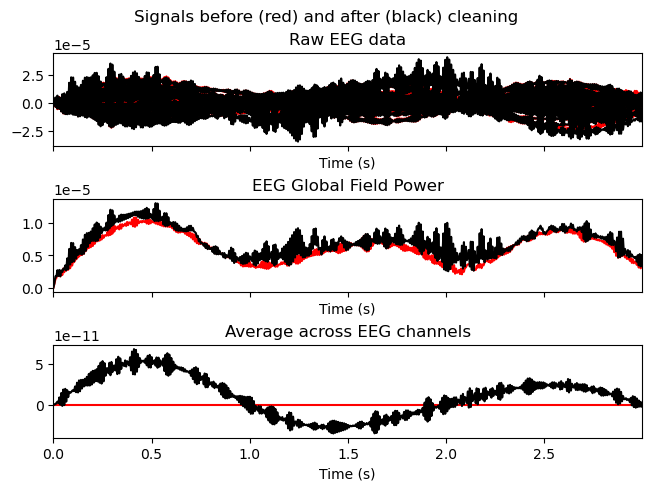

In [10]:
ica.plot_overlay(raw_for_ica,exclude=[1])

In [11]:
ica.exclude=[1]
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components


Measurement date,"August 20, 2022 10:38:01 GMT"
Experimenter,Unknown
Participant,X
Digitized points,35 points
Good channels,"32 EEG, 2 EOG, 1 Stimulus"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


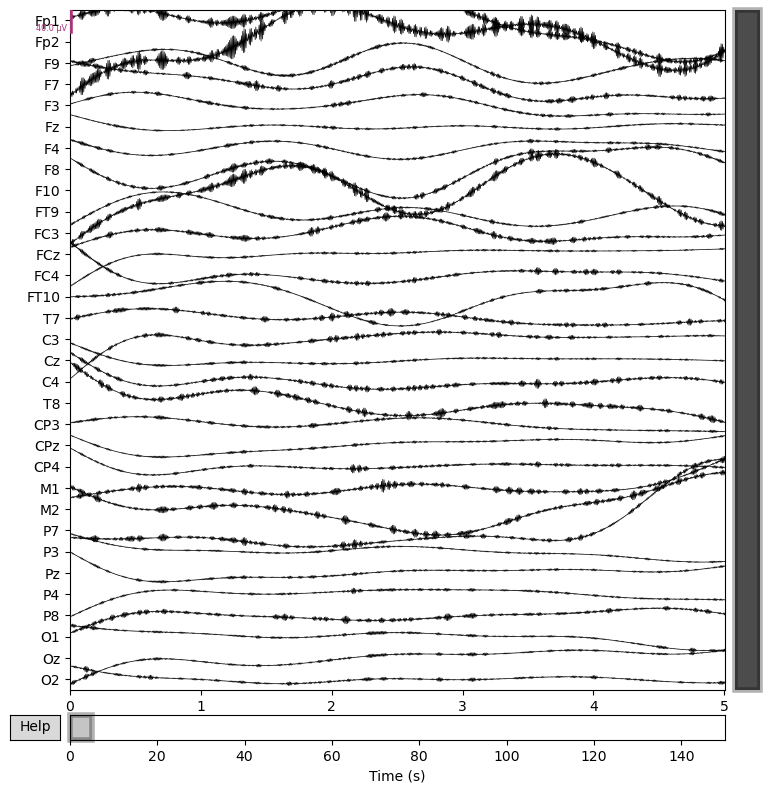

In [14]:
#截止时间
raw.crop(tmin=0,tmax=150).load_data()
raw.pick_types(eeg=True, stim=False).plot(duration=5,n_channels=32,clipping=None)

In [16]:
import pathlib
raw.save(pathlib.Path('C:111') / 't1rest2.raw.fif', overwrite=True)

Overwriting existing file.
Writing C:111\t1rest2.raw.fif
Closing C:111\t1rest2.raw.fif
[done]


Channels marked as bad:
none
Channels marked as bad:
none
